## Evaluate the reconstructed ssGEMs rxn and gene size 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# set working directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database')

In [17]:
# load simulation result
df_ssGEM_simulation_result=pd.read_csv('result/ssGEM_simulation/pan1800_v2_tblastn4_nacore100_etc_ssGEMs_simulation_result.csv',index_col=0)
df_ssGEM_simulation_result

# load strain info
df_strain_info=pd.read_excel(r'data/1897_strains_info.xlsx',index_col=0)
# remove duplicate index in df_strain_info
df_strain_info=df_strain_info[~df_strain_info.index.duplicated(keep='first')]


In [18]:
df_ssGEM_simulation_result
# remove .xml in index
df_ssGEM_simulation_result.index = df_ssGEM_simulation_result.index.str.replace('.xml', '')
df_ssGEM_simulation_result

C:\Users\wangh\AppData\Local\Temp\ipykernel_37720\1448524201.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ssGEM_simulation_result.index = df_ssGEM_simulation_result.index.str.replace('.xml', '')


,gene_numb,rxn_numb,aerobic_growth,aerobic_rxns,anaerobic_growth,anaerobic_rxns
AAA_6.re,1099,3982,0.00000,54,0.000000,0
AAB_6.re,1100,3983,0.08794,496,0.022774,456
AAC_6.re,1082,3962,0.08467,482,0.022353,465
AAD_6.re,1090,3981,0.08794,494,0.022774,482
AAE_6.re,1100,3986,0.08794,476,0.022774,477
...,...,...,...,...,...,...
YDH.re,1099,3990,0.08794,472,0.022774,466
YDI.re,1097,3985,0.08794,481,0.022774,477
YDJ.re,1093,3978,0.08794,507,0.022774,482
YDK.re,1091,3985,0.08794,475,0.022774,449


In [56]:
# add type to df_ssGEM_simulation_result according to df_strain_info['sub_type']
df_ssGEM_simulation_result['type']=df_ssGEM_simulation_result.index.map(lambda x: df_strain_info.loc[x,'sub_type'] if x in df_strain_info.index else 'Unknown')
# change all 0 to unknown
df_ssGEM_simulation_result['type']=df_ssGEM_simulation_result['type'].map(lambda x: 'Unknown' if x==0 else x)
clades_strain_numb=df_ssGEM_simulation_result['type'].value_counts()

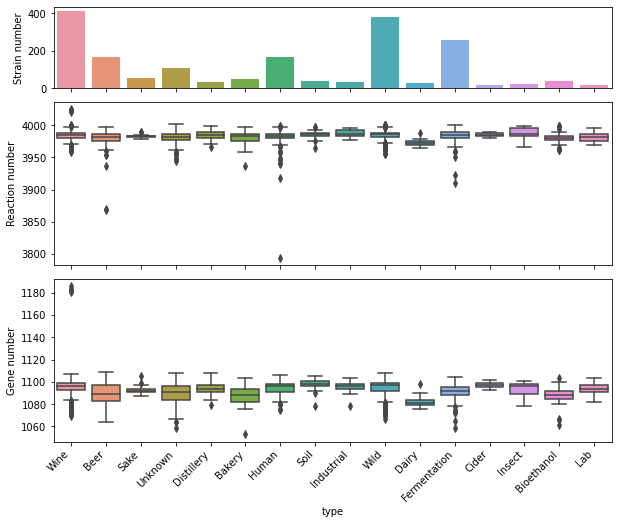

In [72]:
# plot 3 bar plot to show clade size, rxn size and gene size of ssGEMs, and the first subplot height is 3 times of the other two subplots
fig,axes=plt.subplots(3,1,figsize=(10,8),sharex=True,gridspec_kw={'height_ratios':[1,2,2]})
# set space between subplots
plt.subplots_adjust(hspace=0.1)

# box plot for ssGEMs gene number
sns.boxplot(data=df_ssGEM_simulation_result,y='gene_numb',x='type',ax=axes[2])
# set y axis label
axes[2].set_ylabel('Gene number')

# box plot for ssGEMs rxn number
sns.boxplot(data=df_ssGEM_simulation_result,y='rxn_numb',x='type',ax=axes[1])
# set y axis label
axes[1].set_ylabel('Reaction number')
# don't show x axis label and ticklabels
axes[1].set_xlabel('')
axes[1].set_xticklabels('')


# extract xticklabels
xticklabels=axes[2].get_xticklabels()
clades_list=[i.get_text() for i in xticklabels]


# bar plot for ssGEMs clade number
sns.barplot(x=clades_list,y=clades_strain_numb[clades_list],ax=axes[0])
# set y axis label
axes[0].set_ylabel('Strain number')

# rotate xticklabels
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45,ha='right')

# count how many ssGEMs in each type
ssGEM_type_count=df_ssGEM_simulation_result.groupby('type').count()['gene_numb'].values

# ax.set_ylabel('Gene number')
# ax.set_xlabel('ssGEM type')
# ax.set_title('ssGEM size evaluation')
plt.show()

In [73]:
# save result
df_ssGEM_simulation_result.to_csv('result/ssGEM_simulation/df_ssGEMs_size.csv', index=True)